In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [5]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("materials_id", "item_id", "condition_id"))

response_df = raw_df[raw_df.trial_type == "html-slider-response-with-copout"]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.


In [6]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [7]:
# Convert condition_id to independent features
response_df["agent_is_topic"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 0

In [8]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [9]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [10]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,materials_id,...,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_topic,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,5162.6,0.0-3.0,2021-08-03 16:53:47.037,None,...,<NA>,NaN,NaN,True,practice,solid,full,False,False,NaN
4,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,4257.9,0.0-4.0,2021-08-03 16:53:51.297,None,...,<NA>,NaN,NaN,True,practice,liquid,full,False,False,NaN
5,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,3766.4,0.0-5.0,2021-08-03 16:53:55.066,None,...,<NA>,NaN,67.0,False,practice,abstract,empty,False,False,-2.210237
6,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,3886.6,0.0-6.0,2021-08-03 16:53:58.955,None,...,<NA>,NaN,69.0,False,practice,solid,empty,False,False,-1.805431
7,A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB,0,0,3AMYWKA6YCAGQ64BHSV153X6HLY6OB,A2YCOCF3PATN1V,3TL87MO8CMD1GUWWFRDBJ8AYKARFL8,html-slider-response-with-copout,3320.9,0.0-7.0,2021-08-03 16:54:02.278,None,...,<NA>,NaN,80.0,False,practice,abstract,full,False,False,0.420997


In [11]:
response_df.to_csv("responses.csv")

## Preliminaries

In [12]:
len(raw_df.reset_index().uniqueid.unique())

54

### Demo

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

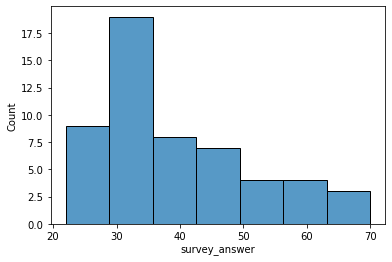

In [13]:
ages = raw_df[(raw_df.trial_type == "survey-text") & (raw_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [14]:
education = raw_df[(raw_df.trial_type == "survey-multi-choice") & (raw_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree               35
Master's degree                 10
Some college                     4
High school/GED                  4
Did not complete high school     1
Name: survey_answer, dtype: int64

In [15]:
native = raw_df[(raw_df.trial_type == "survey-multi-choice") & (raw_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    53
No      1
Name: survey_answer, dtype: int64

### Comments

In [16]:
raw_df[(raw_df.trial_type == "survey-text") & (raw_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                     
31           A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB                                                 Good
             A3A3R002WFC7U3:3SLE99ER0O1YVMZDFSNQWHQ2FQCBZ3                                                 none
             A2KGELV8JP76TJ:3JV9LGBJWU2INZTHT54NHUAVBZ1OGV            Nice task and thanks for the opportunity.
             AJQ71YIGY01HZ:3OLQQLKKNTD62A6T7XMU9V8XZPCEJL                                                      
             A3N4CI434GNSZP:3M68NM076IVJNJWR9KC5ZY2BS8IR65                           very interesting and nice 
             AVBRJBJONL47I:3KKG4CDWKJMZ4WWRWFJ4BFI3QV694F                                                      
             A198MSVO1VTAT5:3UN61F00HXDN4FWD41207SOBWD7R5P                                                     
             A39NHWOMFQZX1X:3O7L7BFSHFDA7ZMNPF1UXUTXMANEI9                                      Interesting one
41           A1W5LBMM1Y2UIR:3PQMUDRV7SUMN4O9L

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

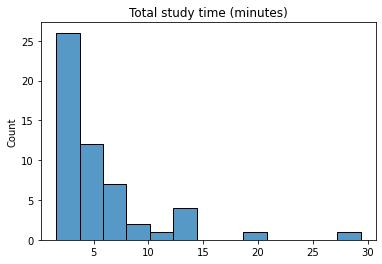

In [17]:
sns.histplot(raw_df.groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [18]:
raw_df.groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.764719
std     4.912498
Name: rt, dtype: float64

### Response times

In [19]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

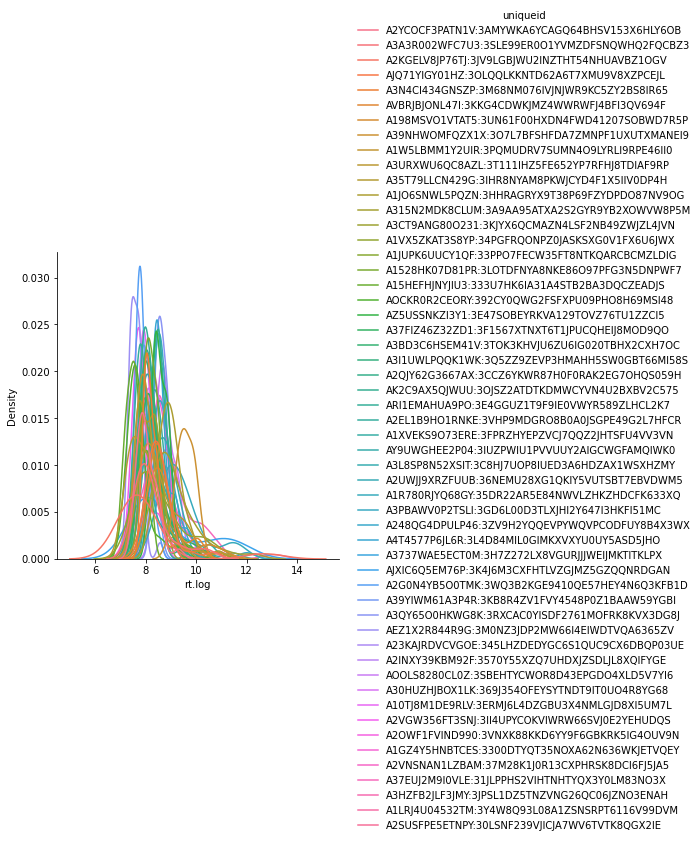

In [20]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

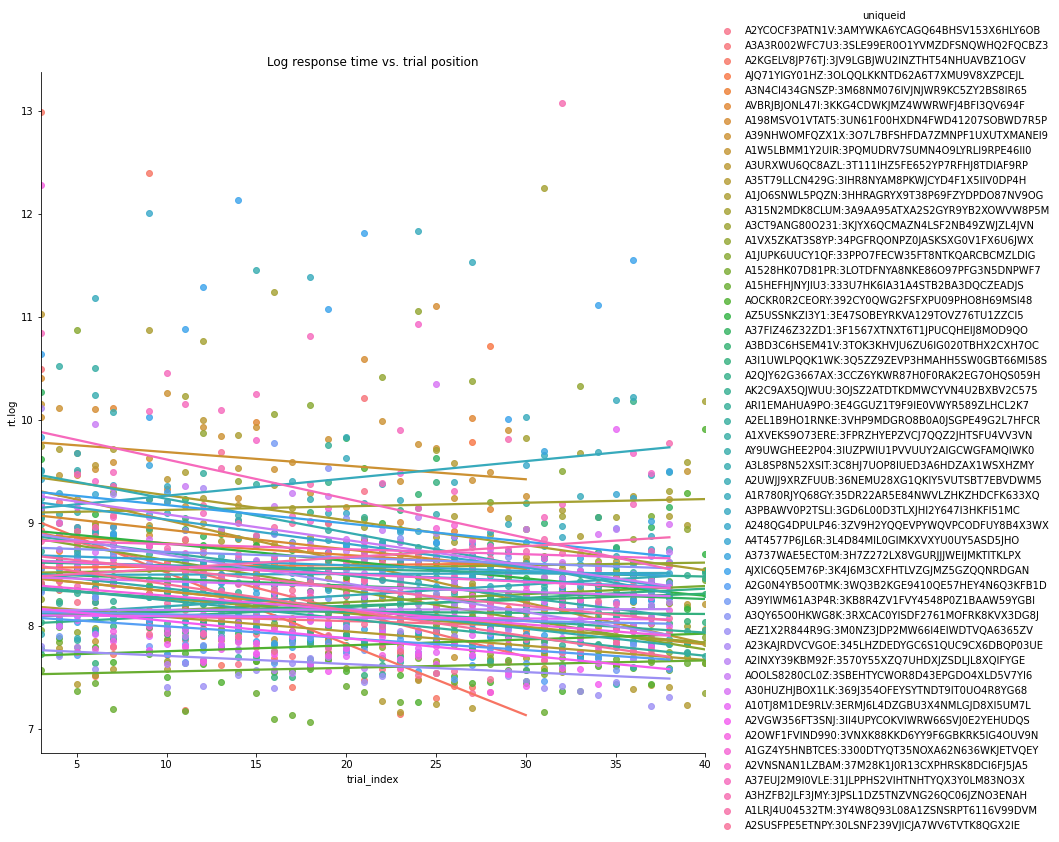

In [21]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped horizontally by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

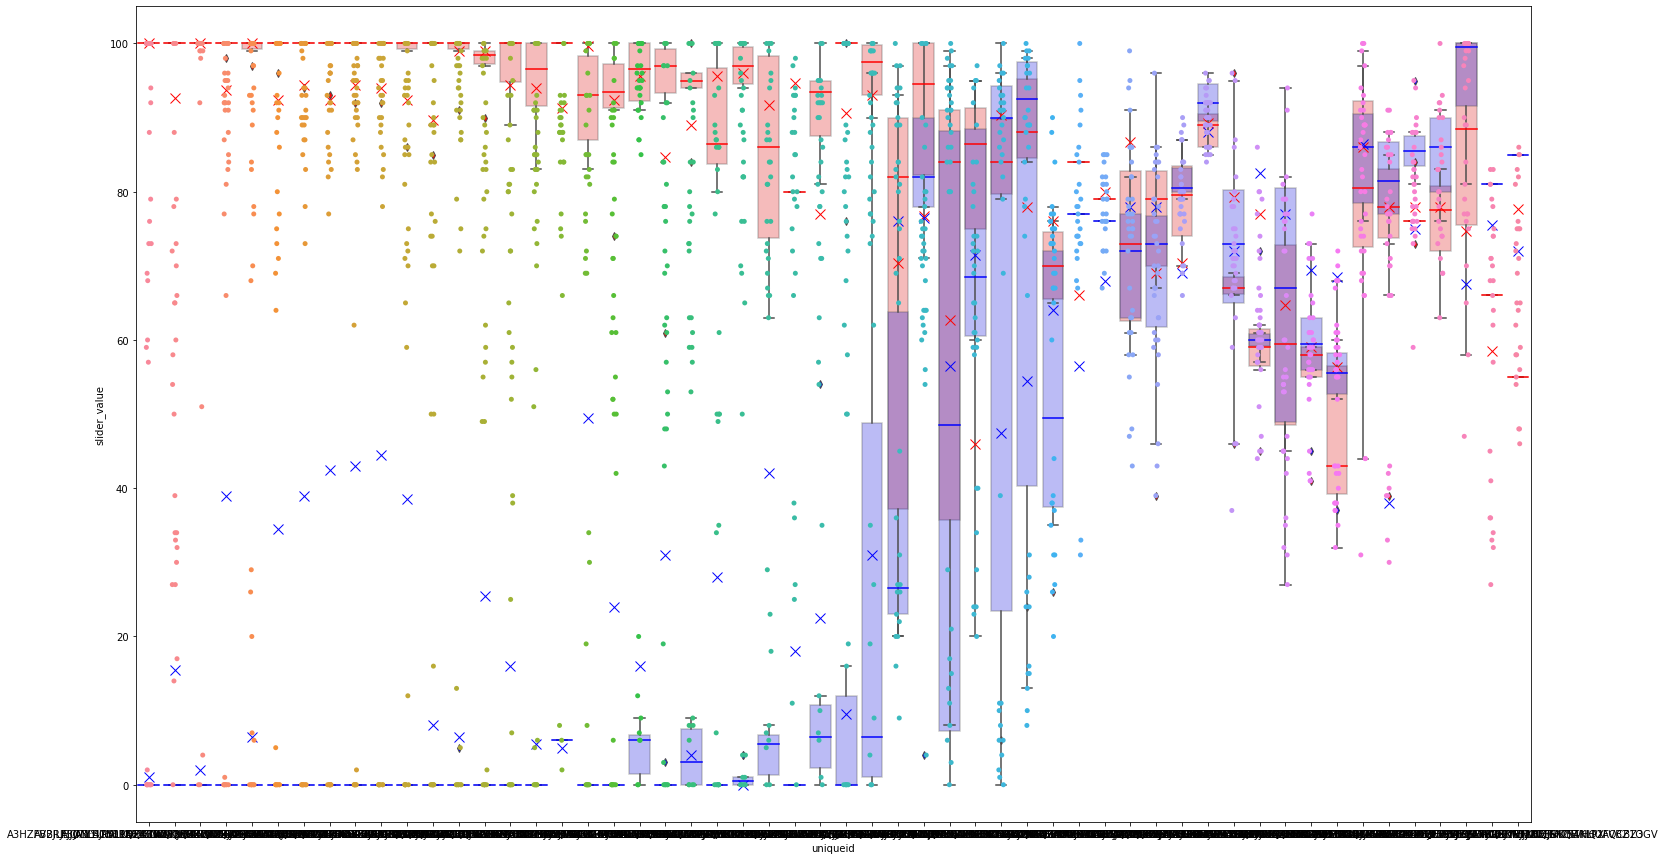

In [22]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

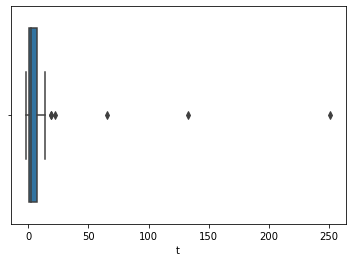

In [23]:
from scipy.stats import ttest_ind
def compute_practice_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" practice items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "practice"]
    
    # Filter out copouts (and print warning -- practice should not trigger copout)
    copout_rows = practice_rows[practice_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {practice_rows.iloc[0].name} had {len(copout_rows)} practice copout(s). Seems fishy.")
    practice_rows = practice_rows[~practice_rows.slider_copout]
    
    full_practice = practice_rows[practice_rows.condition_2 == "full"]
    empty_practice = practice_rows[practice_rows.condition_2 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.boxplot(data=practice_stats.reset_index(), x="t", hue="uniqueid")

In [24]:
practice_stats.sort_values("t")

,t,pval
uniqueid,,
A35T79LLCN429G:3IHR8NYAM8PKWJCYD4F1X5IIV0DP4H,-1.987219,1.410644e-01
A1W5LBMM1Y2UIR:3PQMUDRV7SUMN4O9LYRLI9RPE46II0,-1.820340,1.662642e-01
AOCKR0R2CEORY:392CY0QWG2FSFXPU09PHO8H69MSI48,-1.600735,2.077475e-01
A15HEFHJNYJIU3:333U7HK6IA31A4STB2BA3DQCZEADJS,-1.288124,2.880632e-01
A3PBAWV0P2TSLI:3GD6L00D3TLXJHI2Y647I3HKFI51MC,-1.271254,2.932528e-01
A1JO6SNWL5PQZN:3HHRAGRYX9T38P69FZYDPDO87NV9OG,-0.881804,4.428155e-01
A3A3R002WFC7U3:3SLE99ER0O1YVMZDFSNQWHQ2FQCBZ3,-0.716783,5.479107e-01
A3URXWU6QC8AZL:3T111IHZ5FE652YP7RFHJ8TDIAF9RP,-0.042490,9.687778e-01
A3L8SP8N52XSIT:3C8HJ7UOP8IUED3A6HDZAX1WSXHZMY,0.023893,9.824382e-01


#### Practice copouts

In [25]:
response_df[response_df.condition_0 == "practice"].groupby(["condition_1", "condition_2"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

mean  count
condition_1 condition_2                 
solid       full         0.074074     54
liquid      full         0.055556     54
solid       empty        0.037037     54
abstract    empty        0.018519     54
            full         0.000000     54

### Fillers

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

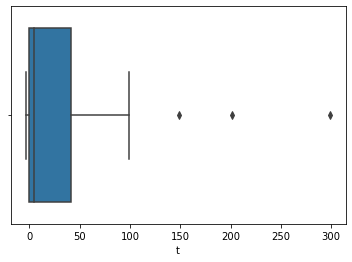

In [26]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [27]:
filler_stats.sort_values("t")

,t,pval
uniqueid,,
A2VGW356FT3SNJ:3II4UPYCOKVIWRW66SVJ0E2YEHUDQS,-3.378429,8.147259e-03
A2SUSFPE5ETNPY:30LSNF239VJICJA7WV6TVTK8QGX2IE,-1.843960,1.077174e-01
A1JUPK6UUCY1QF:33PPO7FECW35FT8NTKQARCBCMZLDIG,-1.618561,1.366117e-01
AOCKR0R2CEORY:392CY0QWG2FSFXPU09PHO8H69MSI48,-1.275368,2.310100e-01
A3737WAE5ECT0M:3H7Z272LX8VGURJJJWEIJMKTITKLPX,-1.238611,2.437763e-01
AEZ1X2R844R9G:3M0NZ3JDP2MW66I4EIWDTVQA6365ZV,-1.008123,3.371660e-01
A2EL1B9HO1RNKE:3VHP9MDGRO8B0A0JSGPE49G2L7HFCR,-0.939683,3.719138e-01
A2G0N4YB5O0TMK:3WQ3B2KGE9410QE57HEY4N6Q3KFB1D,-0.935958,3.713465e-01
A15HEFHJNYJIU3:333U7HK6IA31A4STB2BA3DQCZEADJS,-0.851598,4.143653e-01


#### Filler copouts

In [28]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,,mean,count
item_id,condition_1,,
3.0,empty,0.042553,47
7.0,full,0.041667,48
10.0,full,0.021739,46
6.0,full,0.021277,47
8.0,full,0.021277,47
1.0,empty,0.020833,48
0.0,empty,0.000000,47
2.0,empty,0.000000,48
4.0,empty,0.000000,48


## Final data processing

In [29]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [30]:
practice_drops = practice_stats[(practice_stats.t < 0) | (practice_stats.pval > 1e-1) | practice_stats.t.isna()]
drop_pct = np.round(len(practice_drops) / len(practice_stats.index) * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops.index))
exp_items = exp_items.drop(practice_drops.index, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / len(filler_stats.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

30 subjects (55.6%) disqualified and dropped due to failed practice.
	A10TJ8M1DE9RLV:3ERMJ6L4DZGBU3X4NMLGJD8XI5UM7L
	A1528HK07D81PR:3LOTDFNYA8NKE86O97PFG3N5DNPWF7
	A15HEFHJNYJIU3:333U7HK6IA31A4STB2BA3DQCZEADJS
	A1JO6SNWL5PQZN:3HHRAGRYX9T38P69FZYDPDO87NV9OG
	A1JUPK6UUCY1QF:33PPO7FECW35FT8NTKQARCBCMZLDIG
	A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX
	A1W5LBMM1Y2UIR:3PQMUDRV7SUMN4O9LYRLI9RPE46II0
	A2EL1B9HO1RNKE:3VHP9MDGRO8B0A0JSGPE49G2L7HFCR
	A2KGELV8JP76TJ:3JV9LGBJWU2INZTHT54NHUAVBZ1OGV
	A2OWF1FVIND990:3VNXK88KKD6YY9F6GBKRK5IG4OUV9N
	A2QJY62G3667AX:3CCZ6YKWR87H0F0RAK2EG7OHQS059H
	A2SUSFPE5ETNPY:30LSNF239VJICJA7WV6TVTK8QGX2IE
	A2UWJJ9XRZFUUB:36NEMU28XG1QKIY5VUTSBT7EBVDWM5
	A2VGW356FT3SNJ:3II4UPYCOKVIWRW66SVJ0E2YEHUDQS
	A2YCOCF3PATN1V:3AMYWKA6YCAGQ64BHSV153X6HLY6OB
	A35T79LLCN429G:3IHR8NYAM8PKWJCYD4F1X5IIV0DP4H
	A3737WAE5ECT0M:3H7Z272LX8VGURJJJWEIJMKTITKLPX
	A37FIZ46Z32ZD1:3F1567XTNXT6T1JPUCQHEIJ8MOD9QO
	A39YIWM61A3P4R:3KB8R4ZV1FVY4548P0Z1BAAW59YGBI
	A3A3R002WFC7U3:3SLE99ER0O1YVMZDFSNQWH

In [31]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

19 subjects remaining.


### Merge in materials

In [32]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = set(exp_items.materials_id)
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

# NB this doesn't handle fillers correctly

In [33]:
keep_cols = ["A", "V", "L", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

## Basic visualization

In [34]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

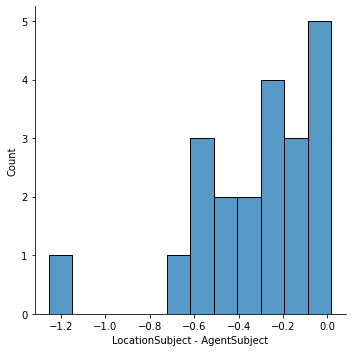

In [35]:
sns.displot(item_differences, bins=12)

In [36]:
item_differences.sort_values(ascending=False)

item_id  A             V        L             A concrete?  A countable?
6.0      terror        cours    body          False        False           0.018012
30.0     fear          prickl   fingertips    False        False           0.003775
58.0     anticipation  tingl    arms          False        False          -0.017035
0.0      bees          swarm    garden        True         True           -0.021316
39.0     sewage        runn     street        True         False          -0.080692
41.0     trepidation   shak     chest         False        False          -0.128728
7.0      excitement    crackl   theater       False        False          -0.152792
25.0     energy        humm     market        False        False          -0.166497
31.0     excitement    puls     temples       False        False          -0.210839
4.0      people        bustl    square        True         True           -0.212545
3.0      trumpets      ring     concert hall  True         True           -0.260870
5.0 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'frogs'),
  Text(1, 0, 'fireflies'),
  Text(2, 0, 'trumpets'),
  Text(3, 0, 'lights'),
  Text(4, 0, 'worms'),
  Text(5, 0, 'ants'),
  Text(6, 0, 'conversation'),
  Text(7, 0, 'cockroaches'),
  Text(8, 0, 'anticipation'),
  Text(9, 0, 'debris'),
  Text(10, 0, 'energy'),
  Text(11, 0, 'excitement'),
  Text(12, 0, 'trepidation'),
  Text(13, 0, 'people'),
  Text(14, 0, 'bees'),
  Text(15, 0, 'tadpoles'),
  Text(16, 0, 'terror'),
  Text(17, 0, 'fear'),
  Text(18, 0, 'sewage'),
  Text(19, 0, 'bubbles')])

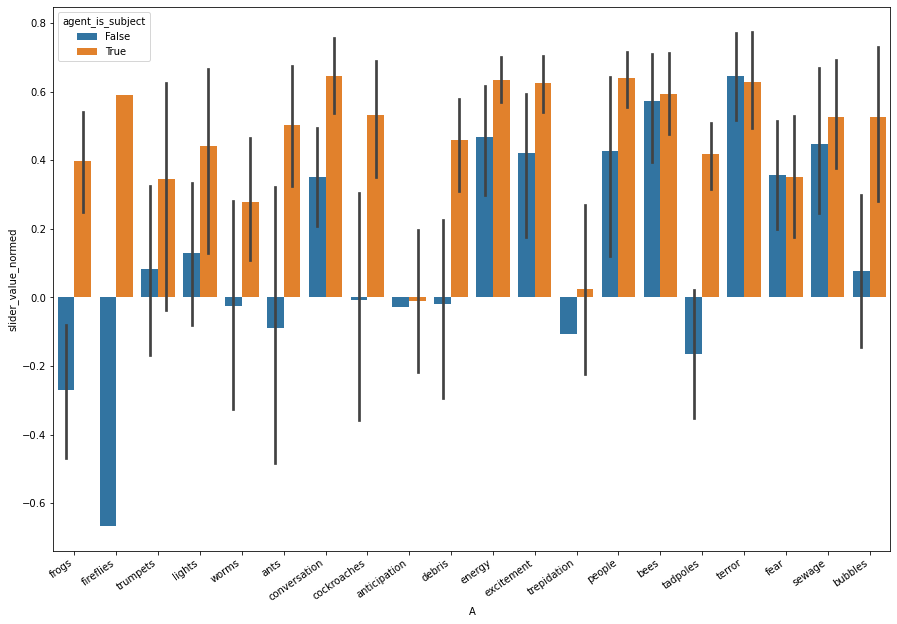

In [49]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="A", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

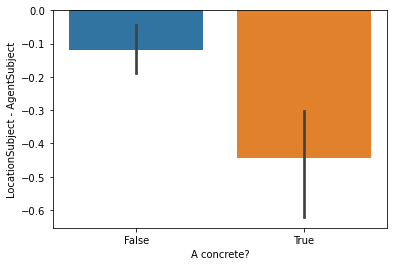

In [38]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

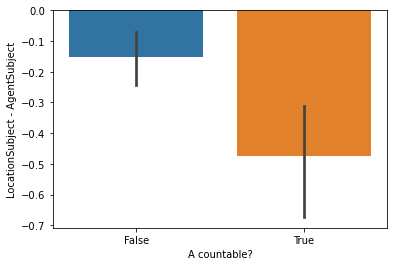

In [39]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

### Copouts

In [40]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [41]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["mean", "count"]))
copouts.sort_values("mean", ascending=False)

slider_copout                                                                                          mean  \
materials_id      item_id agent_is_subject A            V       L        A concrete? A countable?             
swarm-002-promptP 64.0    True             worms        wriggl  bucket   True        True          1.000000   
                  41.0    False            trepidation  shak    chest    False       False         0.500000   
                  20.0    True             fireflies    glimmer backyard True        True          0.500000   
                  58.0    True             anticipation tingl   arms     False       False         0.333333   
                  25.0    False            energy       humm    market   False       False         0.333333   
...                                                                                                     ...   
                          True             energy       humm    market   False       False         0.000000   
                  24.0    True             frogs        hopp    swamp    True        True          0.000000   
                          False            frogs        hopp    swamp    True        True          0.000000   
                  22.0    True             lights       glow    sky      True        True          0.000000   
swarm-003-drops   64.0    True             worms        wriggl  bucket   True        True          0.000000   

slider_copout                                                                                      count  
materials_id      item_id agent_is_subject A            V       L        A concrete? A countable?         
swarm-002-promptP 64.0    True             worms        wriggl  bucket   True        True            1.0  
                  41.0    False            trepidation  shak    chest    False       False           2.0  
                  20.0    True             fireflies    glimmer backyard True        True            2.0  
                  58.0    True             anticipation tingl   arms     False       False           3.0  
                  25.0    False            energy       humm    market   False       False           3.0  
...                                                                                                  ...  
                          True             energy       humm    market   False       False           1.0  
                  24.0    True             frogs        hopp    swamp    True        True            1.0  
                          False            frogs        hopp    swamp    True        True            3.0  
                  22.0    True             lights       glow    sky      True        True            1.0  
swarm-003-drops   64.0    True             worms        wriggl  bucket   True        True            9.0  

[76 rows x 2 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

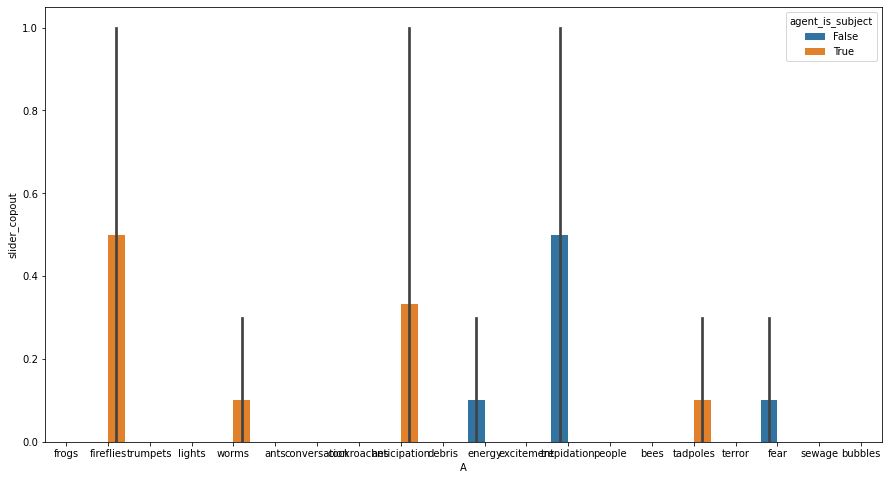

In [42]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

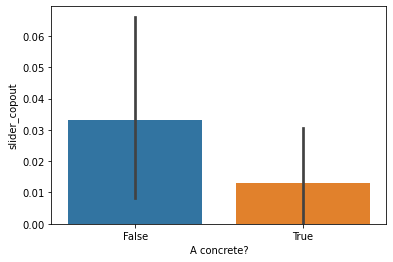

In [43]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

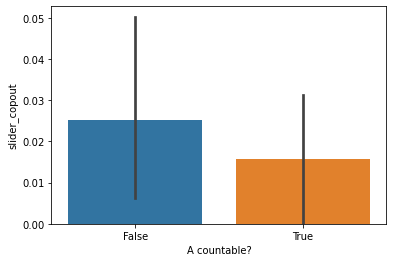

In [44]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

### Item exposure

In [51]:
merged_df.groupby(["item_id", "A", "agent_is_subject"]).size().sort_values()

item_id  A             agent_is_subject
20.0     fireflies     False                1
58.0     anticipation  False                1
41.0     trepidation   True                 2
                       False                2
20.0     fireflies     True                 2
58.0     anticipation  True                 3
31.0     excitement    True                 6
4.0      people        False                6
22.0     lights        True                 7
7.0      excitement    False                7
0.0      bees          False                7
6.0      terror        False                7
5.0      conversation  True                 8
2.0      ants          False                8
17.0     debris        True                 8
3.0      trumpets      False                8
19.0     bubbles       True                 9
24.0     frogs         True                 9
39.0     sewage        False                9
64.0     worms         False                9
30.0     fear          True             

## Extras

In [46]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

,trial_index,materials_id,item_id,condition_0,condition_1,agent_is_subject,slider_value,A,V,L
22,26,swarm-002-promptP,1.0,filler,empty,False,61.0,voices,echo,church
27,31,swarm-002-promptP,8.0,0.0,1.0,False,86.0,cockroaches,creep,cave
17,21,swarm-002-promptP,2.0,filler,empty,False,72.0,ants,crawl,table
28,32,swarm-002-promptP,8.0,filler,full,False,58.0,cockroaches,creep,cave
29,33,swarm-002-promptP,17.0,0.0,1.0,False,55.0,debris,flow,river
13,17,swarm-002-promptP,4.0,filler,empty,False,63.0,people,bustl,square
20,24,swarm-002-promptP,11.0,filler,full,False,79.0,lava,erupt,volcano
12,16,swarm-002-promptP,5.0,filler,empty,False,82.0,conversation,buzz,room
11,15,swarm-002-promptP,10.0,filler,full,False,61.0,saliva,drool,mouth
31,35,swarm-002-promptP,58.0,0.0,1.0,False,75.0,anticipation,tingl,arms
